# Beef Quality Classification

In [1]:
import platform
import psutil
import tensorflow as tf
from datetime import datetime

def get_system_info():
    info = {}
    # Get system information
    info['platform'] = platform.system()
    info['platform-version'] = platform.version()
    info['architecture'] = platform.machine()
    info['hostname'] = platform.node()
    info['processor'] = platform.processor()
    info['ram'] = str(round(psutil.virtual_memory().total / (1024.0 **3))) + " GB"
    return info

print(f'Program start ...')
# Print the system information
system_info = get_system_info()
for key, value in system_info.items():
    print(f"{key}: {value}")

# Print TensorFlow version
print(f'TensorFlow version: {tf.__version__}')
if tf.test.is_gpu_available():
    print(f'GPU is being used by TensorFlow')
    print(f'GPU device name: {tf.test.gpu_device_name()}')
else: print(f'GPU is unavailable for TensorFlow')

# Get the current time
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
# Print the current time
print(f"The current time is: {current_time}")


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Program start ...
platform: Linux
platform-version: #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
architecture: x86_64
hostname: ff65f60a3598
processor: x86_64
ram: 13 GB
TensorFlow version: 2.17.0
GPU is unavailable for TensorFlow
The current time is: 2024-10-23 03:53:14


### (1) Read and Visualize Data

In [2]:
import pandas as pd

df_sheet = pd.read_excel('e-nose_dataset_12_beef_cuts.xlsx', sheet_name='2.Round')
df_sheet

,Minute,TVC,Label,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9
0,1,1.875890,1,14.87,37.65,5.16,20.37,12.25,16.24,28.66,6.11,3.59,46.19,10.01
1,2,1.875890,1,14.94,38.56,5.09,20.46,13.37,16.38,28.50,5.74,3.39,46.19,10.05
2,3,1.875890,1,15.00,39.50,5.07,20.46,12.40,17.01,28.18,6.18,3.25,46.83,10.21
3,4,1.875890,1,14.87,40.48,5.05,20.37,12.50,16.44,28.18,5.60,3.16,46.19,10.13
4,5,1.875890,1,14.87,40.73,5.00,20.27,12.01,16.38,28.50,5.48,3.11,47.48,10.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,2216,5.758033,4,11.48,3.15,27.25,13.06,10.97,8.70,3.01,17.67,34.93,33.36,8.97
2216,2217,5.758033,4,11.35,3.12,27.53,12.90,10.93,8.53,2.96,16.93,34.47,33.55,8.97
2217,2218,5.758033,4,11.26,3.14,27.67,12.90,10.68,8.63,2.96,17.00,36.62,37.90,9.01
2218,2219,5.758033,4,11.35,3.12,27.39,12.90,10.35,8.60,2.95,17.14,34.70,34.51,9.04


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns


### (2) Create Dataset

In [4]:
df_dataset = pd.DataFrame()
df_dataset = df_sheet.copy()

#encode_data = pd.get_dummies(df_dataset.Label)
#df_dataset = pd.concat([df_dataset, encode_data], axis=1)

#df_dataset.drop(columns=['Minute','TVC','Label'], inplace=True)
df_dataset.drop(columns=['Minute','Label'], inplace=True)
df_dataset

,TVC,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9
0,1.875890,14.87,37.65,5.16,20.37,12.25,16.24,28.66,6.11,3.59,46.19,10.01
1,1.875890,14.94,38.56,5.09,20.46,13.37,16.38,28.50,5.74,3.39,46.19,10.05
2,1.875890,15.00,39.50,5.07,20.46,12.40,17.01,28.18,6.18,3.25,46.83,10.21
3,1.875890,14.87,40.48,5.05,20.37,12.50,16.44,28.18,5.60,3.16,46.19,10.13
4,1.875890,14.87,40.73,5.00,20.27,12.01,16.38,28.50,5.48,3.11,47.48,10.13
...,...,...,...,...,...,...,...,...,...,...,...,...
2215,5.758033,11.48,3.15,27.25,13.06,10.97,8.70,3.01,17.67,34.93,33.36,8.97
2216,5.758033,11.35,3.12,27.53,12.90,10.93,8.53,2.96,16.93,34.47,33.55,8.97
2217,5.758033,11.26,3.14,27.67,12.90,10.68,8.63,2.96,17.00,36.62,37.90,9.01
2218,5.758033,11.35,3.12,27.39,12.90,10.35,8.60,2.95,17.14,34.70,34.51,9.04


In [5]:
import numpy as np

ds_values = df_dataset.values

ds_inputs = ds_values[:,1:12]
ds_outputs = ds_values[:,0:1]

print(f'input shape  : {ds_inputs.shape}')
print(ds_inputs[0:5,:])
print(f'output shape : {ds_outputs.shape}')
print(ds_outputs[0:5])

input shape  : (2220, 11)
[[14.87 37.65  5.16 20.37 12.25 16.24 28.66  6.11  3.59 46.19 10.01]
 [14.94 38.56  5.09 20.46 13.37 16.38 28.5   5.74  3.39 46.19 10.05]
 [15.   39.5   5.07 20.46 12.4  17.01 28.18  6.18  3.25 46.83 10.21]
 [14.87 40.48  5.05 20.37 12.5  16.44 28.18  5.6   3.16 46.19 10.13]
 [14.87 40.73  5.   20.27 12.01 16.38 28.5   5.48  3.11 47.48 10.13]]
output shape : (2220, 1)
[[1.87589]
 [1.87589]
 [1.87589]
 [1.87589]
 [1.87589]]


#### Input normalization

In [6]:
inp_min = np.min(ds_inputs); inp_max = np.max(ds_inputs)
print(f'input --> min = {inp_min}; max = {inp_max}')

input --> min = 2.4; max = 54.08


Set new input min and input max, then do input normalization

In [7]:
def normalization(x,xmin,xmax):
    return 2*(x-xmin)/(xmax-xmin) - 1

inp_min, inp_max = 0.0, 60.0
ds_inputs_norm = normalization(ds_inputs, inp_min, inp_max)

print(f'input normalization shape: {ds_inputs_norm.shape}')
print(ds_inputs_norm[0:5,:])

input normalization shape: (2220, 11)
[[-0.50433333  0.255      -0.828      -0.321      -0.59166667 -0.45866667
  -0.04466667 -0.79633333 -0.88033333  0.53966667 -0.66633333]
 [-0.502       0.28533333 -0.83033333 -0.318      -0.55433333 -0.454
  -0.05       -0.80866667 -0.887       0.53966667 -0.665     ]
 [-0.5         0.31666667 -0.831      -0.318      -0.58666667 -0.433
  -0.06066667 -0.794      -0.89166667  0.561      -0.65966667]
 [-0.50433333  0.34933333 -0.83166667 -0.321      -0.58333333 -0.452
  -0.06066667 -0.81333333 -0.89466667  0.53966667 -0.66233333]
 [-0.50433333  0.35766667 -0.83333333 -0.32433333 -0.59966667 -0.454
  -0.05       -0.81733333 -0.89633333  0.58266667 -0.66233333]]


#### Split dataset into 80% train and 20% test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(ds_inputs_norm, ds_outputs, test_size=0.15, random_state=42)

print(f'Train set --> input shape: {X_train.shape}, output shape: {Y_train.shape}')
print(f'Test set  --> input shape: {X_test.shape}, output shape: {Y_test.shape}')

Train set --> input shape: (1887, 11), output shape: (1887, 1)
Test set  --> input shape: (333, 11), output shape: (333, 1)


### (3) Build Model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='sigmoid', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(1, activation='relu') ])

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='linear')
# ])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)

### (4) Train model

In [17]:
import time
import datetime

epochs = 10000
batch_size = len(X_train)
print('Batch size: ',batch_size)

X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
Y_train_tensor = tf.convert_to_tensor(Y_train, dtype=tf.float32)
Y_test_tensor = tf.convert_to_tensor(Y_test, dtype=tf.float32)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=50, min_lr=1e-6)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=75, restore_best_weights=True)

optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

starttime = time.time()

model_history = model.fit(X_train_tensor,Y_train_tensor, epochs=epochs,
    validation_data=(X_test_tensor, Y_test_tensor), verbose=2, batch_size=batch_size,
    callbacks=[reduce_lr, early_stopping] )

stoptime =  time.time()-starttime
trainingtime = datetime.timedelta(seconds=stoptime)
print(f'\nTraining time : {trainingtime}')
print(f'End of training')

Streaming output truncated to the last 5000 lines.
1/1 - 0s - 137ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0122 - val_mse: 0.0122 - learning_rate: 1.0000e-06
Epoch 7503/10000
1/1 - 0s - 56ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0122 - val_mse: 0.0122 - learning_rate: 1.0000e-06
Epoch 7504/10000
1/1 - 0s - 144ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0122 - val_mse: 0.0122 - learning_rate: 1.0000e-06
Epoch 7505/10000
1/1 - 0s - 131ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0122 - val_mse: 0.0122 - learning_rate: 1.0000e-06
Epoch 7506/10000
1/1 - 0s - 58ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0122 - val_mse: 0.0122 - learning_rate: 1.0000e-06
Epoch 7507/10000
1/1 - 0s - 55ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0122 - val_mse: 0.0122 - learning_rate: 1.0000e-06
Epoch 7508/10000
1/1 - 0s - 57ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0122 - val_mse: 0.0122 - learning_rate: 1.0000e-06
Epoch 7509/10000
1/1 - 0s - 137ms/step 

### (5) Performance Evaluation
#### Training

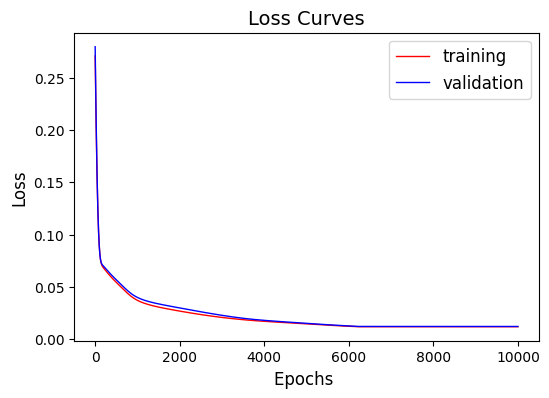

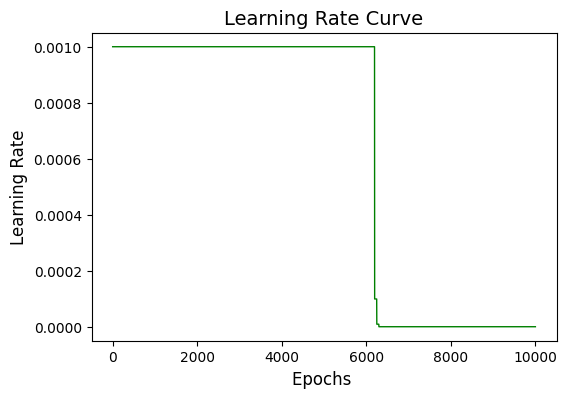

In [18]:
plt.figure(figsize=[6, 4])
plt.plot(model_history.history['loss'], 'r', linewidth=1.0)
plt.plot(model_history.history['val_loss'], 'b', linewidth=1.0)
plt.legend(['training', 'validation'], fontsize=12)
plt.xlabel('Epochs ', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss Curves', fontsize=14)
plt.show()

# plt.figure(figsize=[6, 4])
# plt.plot(model_history.history['accuracy'], 'r', linewidth=1.0)
# plt.plot(model_history.history['val_accuracy'], 'b', linewidth=1.0)
# plt.legend(['training', 'validation'], fontsize=12)
# plt.xlabel('Epochs ', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.title('Accuracy Curves', fontsize=14)
# plt.show()

plt.figure(figsize=[6, 4])
plt.plot(model_history.history['learning_rate'], 'g', linewidth=1.0)
plt.xlabel('Epochs ', fontsize=12)
plt.ylabel('Learning Rate', fontsize=12)
plt.title('Learning Rate Curve', fontsize=14)
plt.show()

#### Confusion Matrix

[-0.64333333 -0.89433333 -0.10933333 -0.554      -0.713      -0.63333333
 -0.89866667 -0.346       0.031       0.02433333 -0.71366667]
[5.29893206]
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[5.4405856]
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


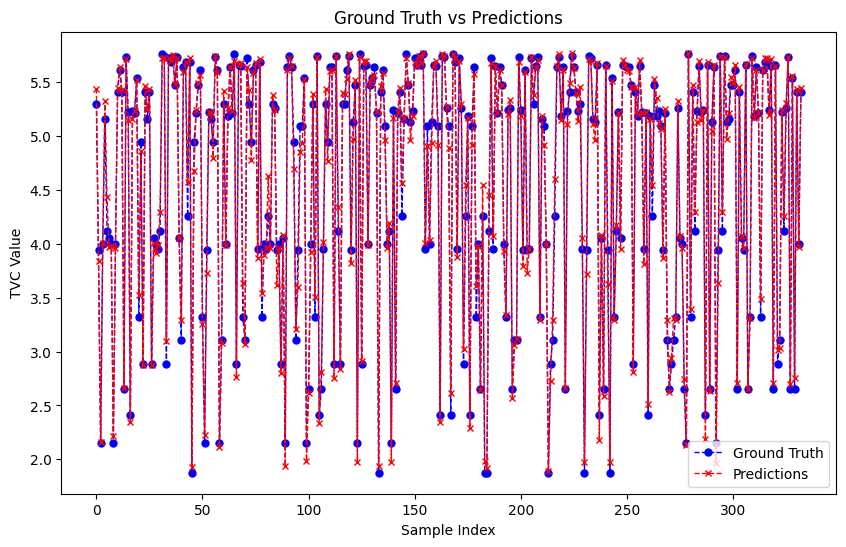

In [19]:
plt.figure(figsize=(10, 6))

print(X_test[0,:]); print(Y_test[0])
inference_result = model.predict(X_test)
print(inference_result[0])


# Plot ground truth
plt.plot(Y_test, label='Ground Truth', color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=5)

# Plot predictions
# Perform inference
pred_test_encode = model.predict(X_test_tensor)

# Plot predictions
plt.plot(pred_test_encode, label='Predictions', color='red', marker='x', linestyle='dashed', linewidth=1, markersize=5)

plt.xlabel('Sample Index')
plt.ylabel('TVC Value')
plt.title('Ground Truth vs Predictions')
plt.legend()
plt.show()

#### Precision, Recall, F1 Score

In [ ]:
print(metrics.classification_report(out_test, pred_test, target_names=output_label))

### (6) Explore the Model
Model weights and biases

In [20]:
dense_layer1 = model.layers[0]
weights1, biases1 = dense_layer1.get_weights()
print(f'Weights_1 shape: {weights1.shape}')
print(f'Biases_1 shape: {biases1.shape}')
print(f'Weights_1:\n {weights1}')
print(f'Biases_1 :\n {biases1}')

dense_layer2 = model.layers[1]
weights2, biases2 = dense_layer2.get_weights()
print(f'Weights_2 shape: {weights2.shape}')
print(f'Biases_2 shape: {biases2.shape}')
print(f'Weights_2:\n {weights2}')
print(f'Biases_2 :\n {biases2}')

Weights_1 shape: (11, 11)
Biases_1 shape: (11,)
Weights_1:
 [[-2.65287369e-01 -1.27115512e+00  9.39582944e-01 -8.90317857e-01
   1.44694197e+00  1.93205559e+00 -8.80651057e-01  1.23062992e+00
   1.59381647e-02 -3.32673758e-01 -4.77678835e-01]
 [ 3.61963511e+00 -3.45256478e-01 -1.12425041e+00 -1.16525984e+00
  -5.91509461e-01  1.23600745e+00  9.60352421e-01 -2.02370986e-01
  -4.62805539e-01  1.07969820e+00  8.04597735e-01]
 [-2.19792977e-01  9.34822500e-01 -1.70175183e+00  1.42832208e+00
  -1.29374266e+00 -4.38634038e-01  1.15971446e+00 -1.32825196e+00
   1.69425142e+00  1.20822775e+00  1.38440299e+00]
 [-2.14377880e+00 -9.11462307e-01  1.28679502e+00 -1.43151629e+00
   1.51552141e+00  1.10685575e+00 -1.17188406e+00  1.48467219e+00
  -5.92845500e-01 -9.00194883e-01 -4.21331704e-01]
 [ 7.27387965e-01 -4.01304096e-01  1.02236055e-01 -8.56765449e-01
   3.45567316e-01  7.64183998e-01 -1.66355282e-01  4.95008349e-01
   7.23972082e-01  5.20481765e-01 -3.86937588e-01]
 [-2.02838039e+00 -1.1698